# Analizando un poco la data 



In [1]:
#import all libraries!
import pandas as pd # el as pd es un alias, hace el codigo un poco mas corto

In [2]:
#importemos (carguemos en memoria) la data
#pandas carga la data como un dataframe o matriz, tal como si tuvieramos un spreadsheet

data = pd.read_csv('data/titanic.csv')

#previsualicemos la data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#cual es la dimension (filas, columnas) de mi dataframe?
print data.shape

(891, 12)


In [11]:
# Tengo datos completos para todos los registros?
# el metodo count cuanto cada registro(fila) que tenga datos
# podemos ver que por ejemplo para la columna Cabin tengo algunos registros sin datos
print data.count() 

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [24]:
# Pero tener datos, no significa tener datos "limpios"
# Podemos ver en la previsualizacion que para la columna Cabin tengo algunos NaN, el cual en python 
# es interpretado como un valor nulo o Null, lo cual me podria traer problemas cuando analice la data
# contemos cuantos datos nulos tenemos

# 1. Obtener los nombres de las columnas como una lista
col_names = data.columns.tolist()
# 2. Iterar sobre la lista
for column in col_names:
    print "Valores nulos en <{0}>: {1}".format(column, data[column].isnull().sum())  

Valores nulos en <PassengerId>: 0
Valores nulos en <Survived>: 0
Valores nulos en <Pclass>: 0
Valores nulos en <Name>: 0
Valores nulos en <Sex>: 0
Valores nulos en <Age>: 177
Valores nulos en <SibSp>: 0
Valores nulos en <Parch>: 0
Valores nulos en <Ticket>: 0
Valores nulos en <Fare>: 0
Valores nulos en <Cabin>: 687
Valores nulos en <Embarked>: 2


In [7]:
# Imagina que para fines de simplicidad quieres reemplazar el female, male por F, M

# 1. Creamos un diccionario con los valores originales y los valores de reemplazo
d = {'male' : 'M', 'female' : 'F'}

# 2. Utilizamos un lambda para el reemplazo, en una sola linea n.n
data['Sex'] = data['Sex'].apply(lambda x:d[x])

#checa el cambio
data['Sex'].head()

0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object

In [157]:
#Una forma mas sencilla de acceder a las columnas
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [5]:
# Podemos dar un vistazo a la distribucion de los datos
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Vemos que el minimo en Fare (precio) es 0 
# Cuantos no pagaron?
data[data.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


# Visualicemos!

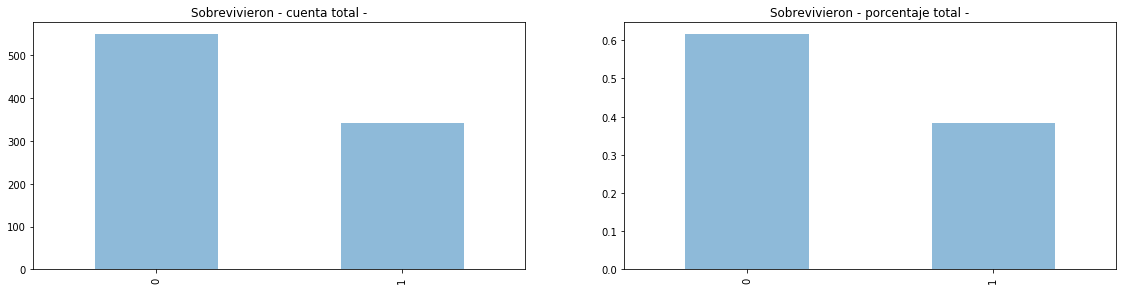

In [4]:
import matplotlib.pyplot as plt

 
fig = plt.figure(figsize=(30,10)) #creamos un canvas o figura de 30x10 pixeles

# queremos ver un plot al costado del otro, para esto pensemos en una grilla (celdas)
plt.subplot2grid((2,3),(0,0))
data.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Sobrevivieron - cuenta total -')

# Hay manera un poco mas amigable de interpretar datos....con porcentajes!
plt.subplot2grid((2,3),(0,1))
data.Survived.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('Sobrevivieron - porcentaje total -')

plt.show()


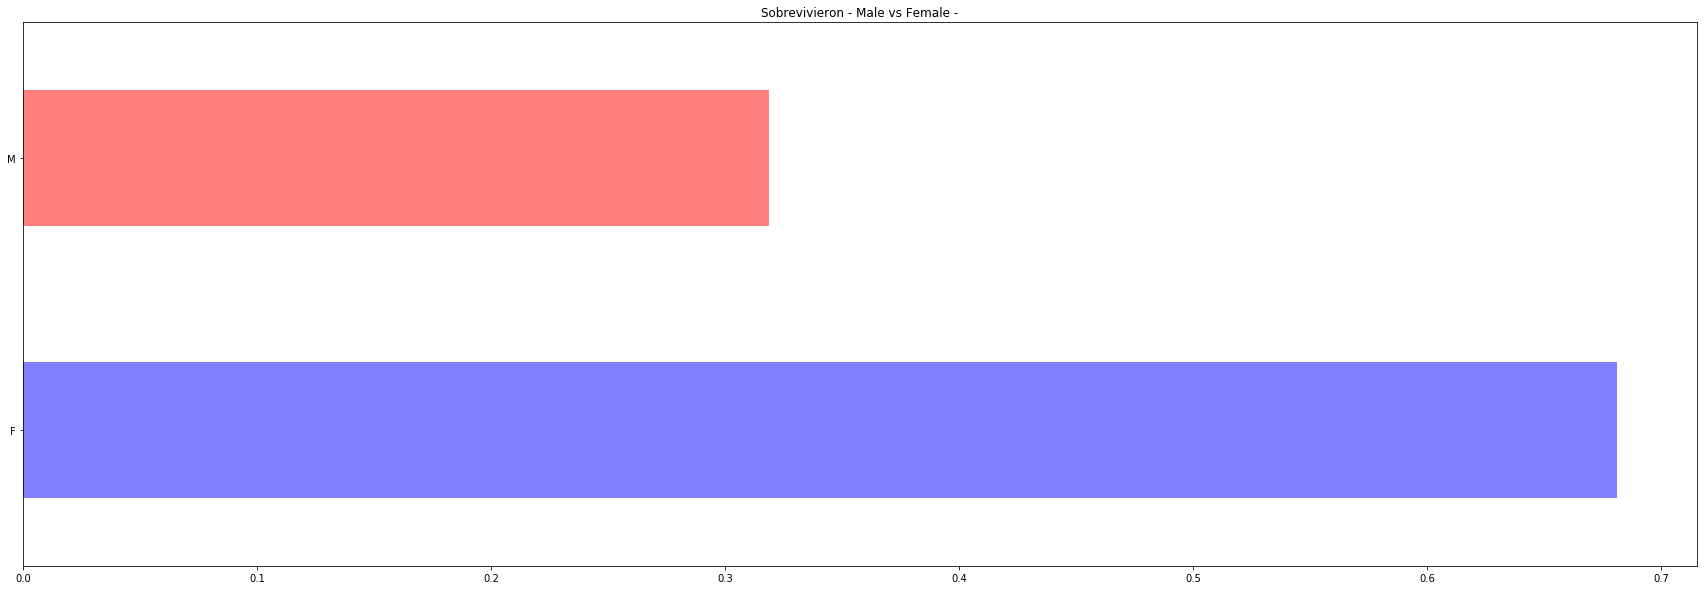

In [11]:
#Sobrevivieron mas hombres o mas mujeres?
fig = plt.figure(figsize=(30,10))
data.Sex[data.Survived == 1].value_counts(normalize = True).plot(kind='barh', alpha=0.5, color='br')
plt.title('Sobrevivieron - Male vs Female -')
plt.show()

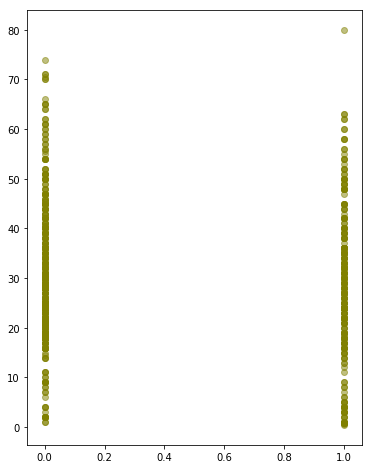

In [17]:
# Que relacion hay entre sobrevivencia y edad de los sobrevivientes
fig = plt.figure(figsize=(6,8))
plt.scatter(data.Survived, data.Age, alpha=0.5, color='#808000')
plt.show()

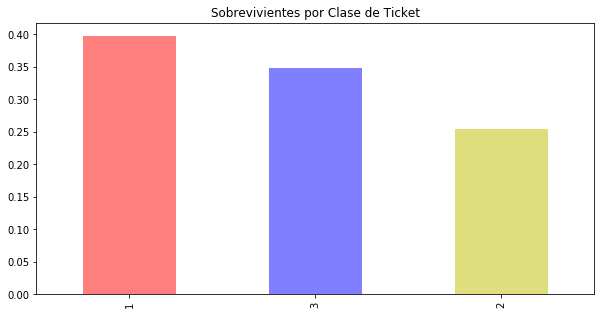

In [8]:
# La clase del ticket fue un factor de sobrevivencia (si viste Titanic, ya lo sabes!)
fig = plt.figure(figsize=(10,5))
#colors bgrcmykw
data.Pclass[data.Survived == 1 ].value_counts(normalize = True).plot(kind='bar', alpha=0.5, color='rby')
plt.title('Sobrevivientes por Clase de Ticket')
plt.show()

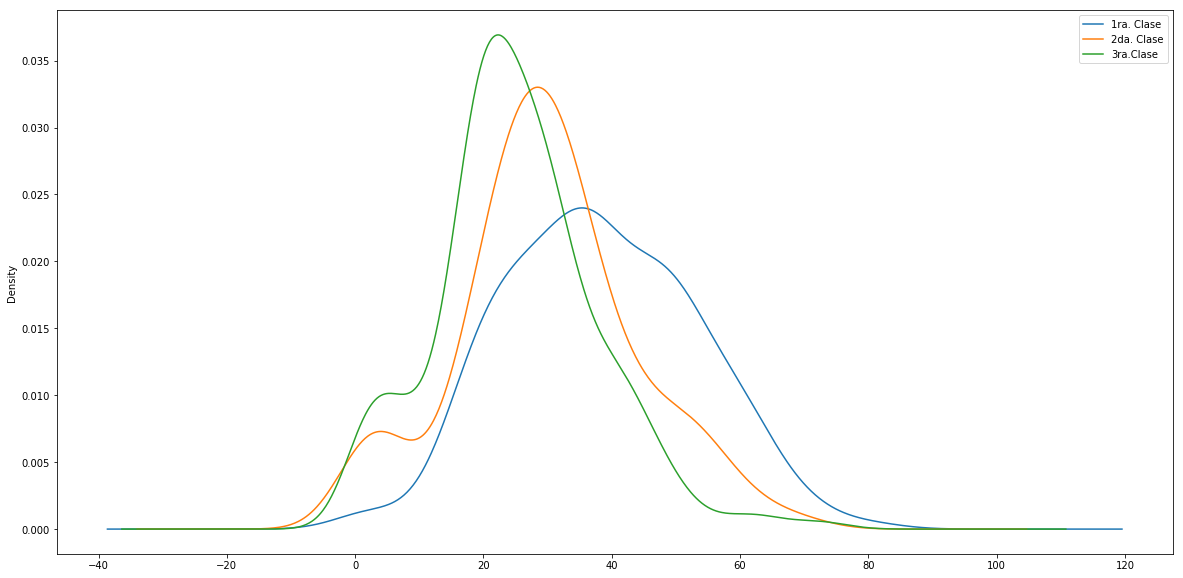

In [156]:
# Habra alguna relacion entre tipo de ticket y edad? (Poder Adquisitivo)
fig = plt.figure(figsize=(20,10))

for t_class in [1,2,3]:
    data.Age[data.Pclass == t_class].plot(kind='kde')
    
plt.legend(("1ra. Clase", "2da. Clase", "3ra.Clase"))  
plt.show()

# La linea de la 1ra clase, nos muestra que el promedio de edad del comprador es de 40 annios
# La linea de la 3ra clase, tiene un promedio mucho mas joven

# Podriamos hacer una inferencia temprana y decir que los hombres que salvaron fueron 
# en su mayoria ricos y > 30 annios


In [16]:
data[data.Age < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
